# Multiple Linear Regression Model Assumptions

- Predictors are either quantitative or categorical (with 2 categories).

- All predictors have a variance > 0.

- Homoscedastic Residuals

- Independent Errors/Residuals
  - When this is violated you typically see patterns in the residuals.
  - Can use a Durbin-Watson Test to look for serial correlations between residuals. 

- Normally distributed errors/residuals with a mean of 0.

- No multicolinearity.

- Linearity

# The Full Model

In [1]:
options(repr.plot.width = 7, repr.plot.height = 5)
library(ggplot2)

In [2]:
bf <- read.csv("Edible_grains.csv")

In [3]:
mod3 <- lm(rating ~ sugar + fat + fiber, data = bf)

# Are the Residuals Homoscedastic?

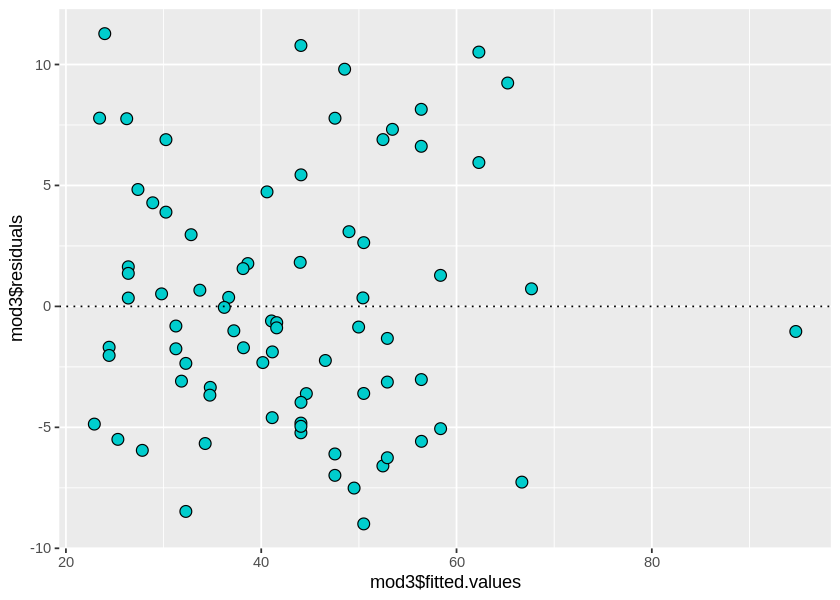

In [4]:
ggplot(mapping = aes(x = mod3$fitted.values, y = mod3$residuals)) +
  geom_point(shape = 21, colour = "black", fill = "cyan3", size = 3) +
  geom_hline(yintercept = 0, linetype = 3)

# Are the Residuals Normally Distributed around 0?

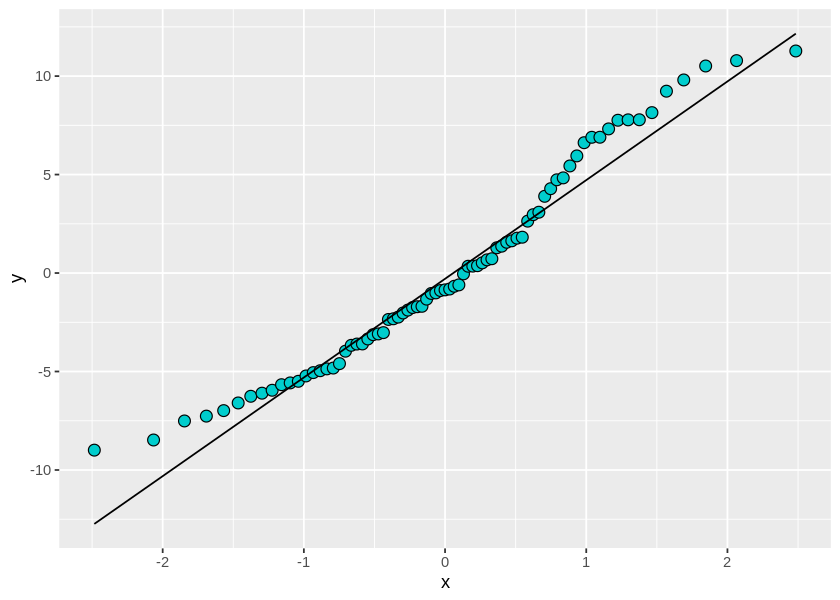

In [7]:
ggplot(mapping = aes(sample = mod3$residuals)) +
  stat_qq(shape = 21, colour = "black", fill = "cyan3", size = 3) +
  stat_qq_line()

# Assessing the Independence of the Residuals

**Durbin-Watson Test:**

$H_0$: There is no autocorrelation amoung the residuals/errors.

$H_1$: The residuals are autocorrelated.

In [8]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [9]:
dwt(mod3)

 lag Autocorrelation D-W Statistic p-value
   1       0.1106527      1.777923   0.304
 Alternative hypothesis: rho != 0

# Assessing Multicolinearity

- *Correlation Matrix:* A table that shows the correlation of each predictor with every other predictor.

In [10]:
names(bf)

[1] "name"          "age"           "producer"      "variety"      
 [5] "calories"      "protein"       "fat"           "sodium"       
 [9] "fiber"         "carbohydrates" "sugar"         "potassium"    
[13] "vit_min"       "shelf"         "weight"        "cups"         
[17] "rating"

In [11]:
bf[, c(11, 7, 9)]

sugar,fat,fiber
<int>,<int>,<dbl>
6,1,10.0
8,5,2.0
5,1,9.0
0,0,14.0
8,2,1.0
10,2,1.5
14,0,1.0
8,2,2.0
6,1,4.0


In [12]:
cor(bf[, c(11, 7, 9)])

,sugar,fat,fiber
sugar,1.0000000,0.27081918,-0.14120539
fat,0.2708192,1.00000000,0.01671924
fiber,-0.1412054,0.01671924,1.00000000


## Plotting a Correlation Matrix

In [13]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




In [14]:
cor_matrix <- cor(bf[, c(11, 7, 9)])

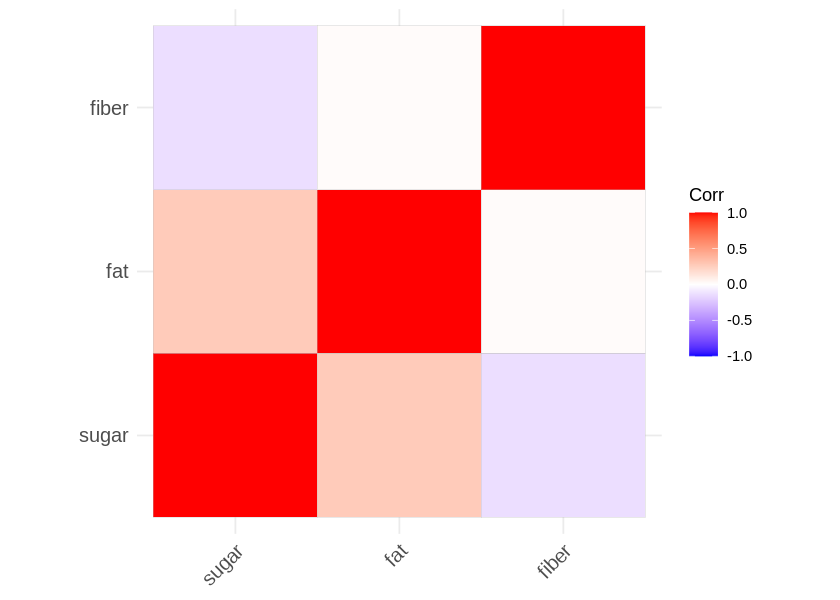

In [16]:
ggcorrplot(cor_matrix)

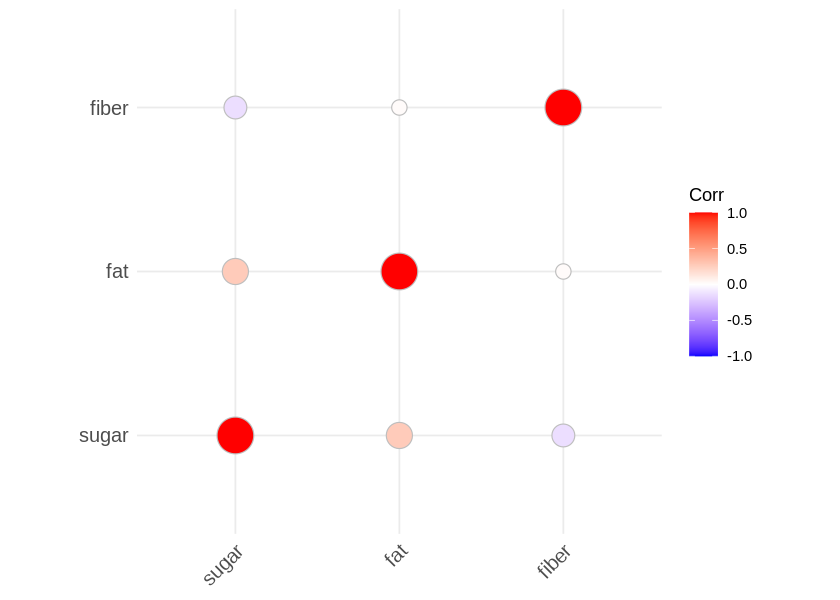

In [17]:
ggcorrplot(cor_matrix, method = "circle")

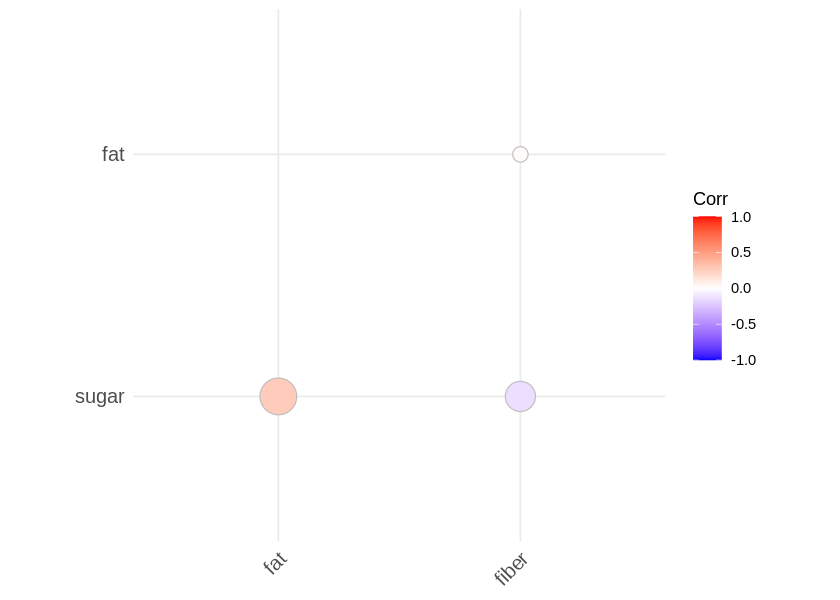

In [18]:
ggcorrplot(cor_matrix, method = "circle",
                      type = "lower")

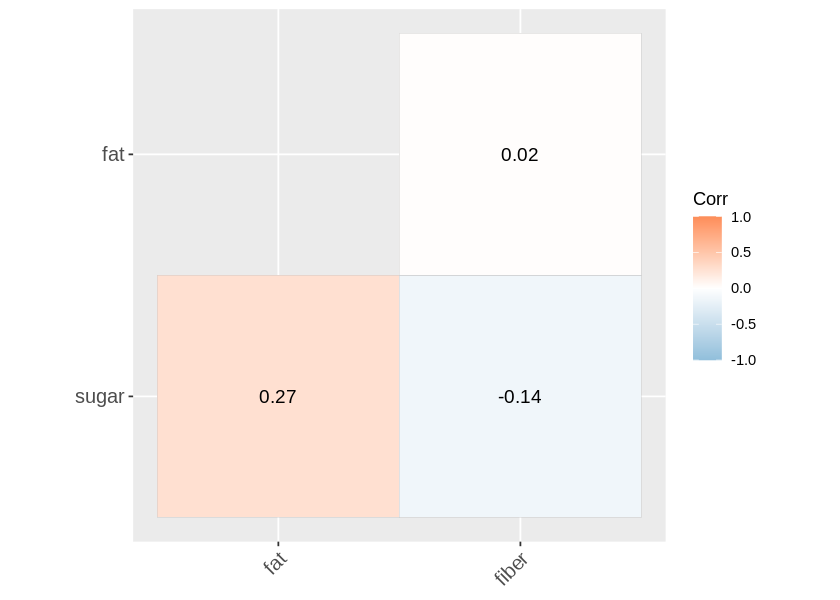

In [22]:
ggcorrplot(cor_matrix,
                      type = "lower",
                      ggtheme = theme_gray,
                      colors = c("#91BFDB", "white", "#FC8D59"),
                      lab = TRUE)

In [23]:
names(bf)

[1] "name"          "age"           "producer"      "variety"      
 [5] "calories"      "protein"       "fat"           "sodium"       
 [9] "fiber"         "carbohydrates" "sugar"         "potassium"    
[13] "vit_min"       "shelf"         "weight"        "cups"         
[17] "rating"

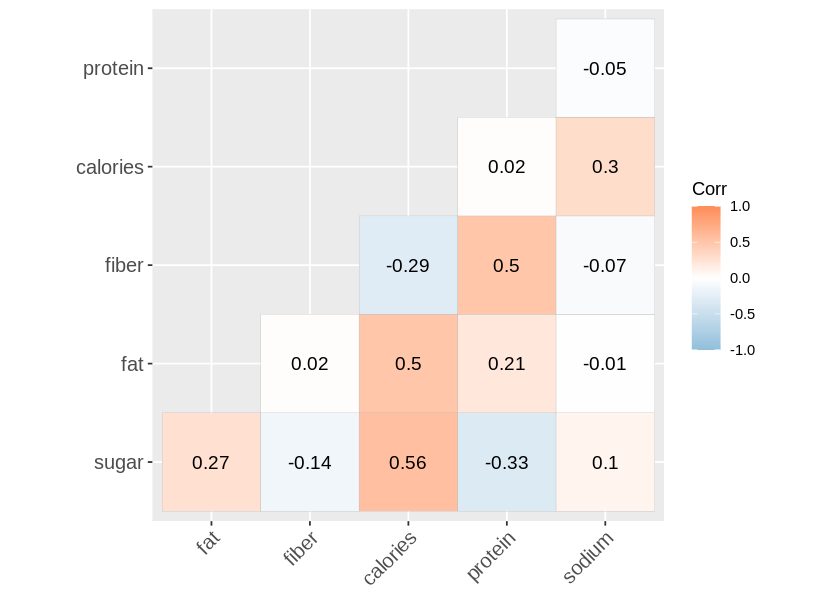

In [24]:
cor_matrix <- cor(bf[, c(11, 7, 9, 5, 6, 8)])

ggcorrplot(cor_matrix,type = "lower",
                      ggtheme = theme_gray,
                      colors = c("#91BFDB", "white", "#FC8D59"),
                      lab = TRUE)

In [26]:
print(vif(mod3))

   sugar      fat    fiber 
1.104469 1.082749 1.023750 


# Assessing Linearity

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


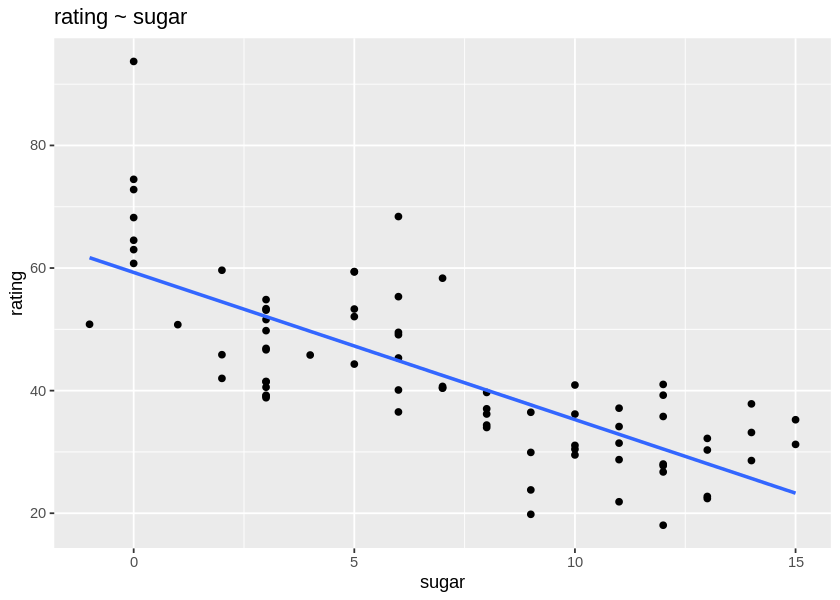

`geom_smooth()` using formula = 'y ~ x'


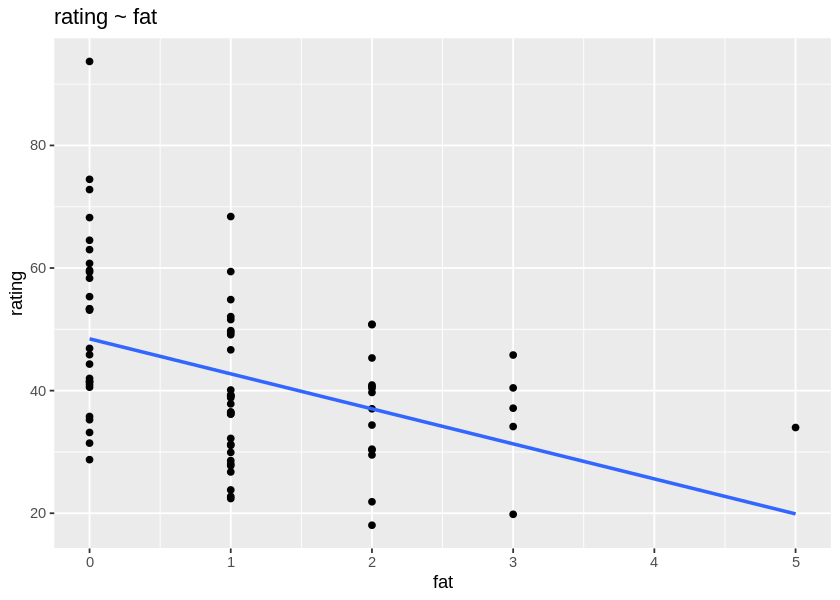

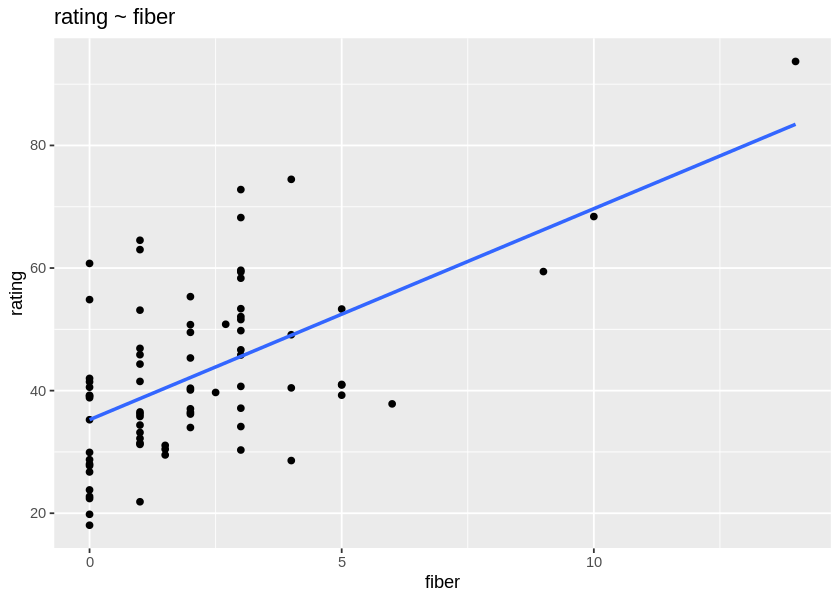

In [28]:
ggplot(bf, aes(x = sugar, y = rating)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("rating ~ sugar")

ggplot(bf, aes(x = fat, y = rating)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("rating ~ fat")

ggplot(bf, aes(x = fiber, y = rating)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("rating ~ fiber")

# Removing Mistaken Values and Outliers

In [29]:
subset(bf, sugar < 0)

,name,age,producer,variety,calories,protein,fat,sodium,fiber,carbohydrates,sugar,potassium,vit_min,shelf,weight,cups,rating
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
58,Quaker Oatmeal,adult,Q,Hot,100,5,2,0,2.7,-1,-1,110,0,1,1,0.67,50.82839


In [30]:
bf <- subset(bf, sugar >= 0)

In [32]:
bf$sugar_out <- abs(bf$sugar - median(bf$sugar)) / mad(bf$sugar) > 2.24
bf$fat_out <- abs(bf$fat - median(bf$fat)) / mad(bf$fat) > 2.24
bf$fiber_out <- abs(bf$fiber - median(bf$fiber)) / mad(bf$fiber) > 2.24

In [34]:
subset(bf, sugar_out == TRUE, select = c("name", "sugar", "rating"))

name,sugar,rating
<chr>,<int>,<dbl>


In [35]:
subset(bf, fat_out == TRUE, select = c("name", "fat", "rating"))

,name,fat,rating
,<chr>,<int>,<dbl>
2,100% Natural Bran,5,33.98368


In [36]:
subset(bf, fiber_out == TRUE, select = c("name", "fiber", "rating"))

,name,fiber,rating
,<chr>,<dbl>,<dbl>
1,100% Bran,10,68.40297
3,All-Bran,9,59.42551
4,All-Bran with Extra Fiber,14,93.70491
53,Post Nat. Raisin Bran,6,37.84059


In [37]:
bf_cln <- subset(bf, sugar_out == FALSE & fat_out == FALSE & fiber_out == FALSE)

In [38]:
bf[1,]

,name,age,producer,variety,calories,protein,fat,sodium,fiber,carbohydrates,sugar,potassium,vit_min,shelf,weight,cups,rating,sugar_out,fat_out,fiber_out
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,100% Bran,adult,N,Cool,70,4,1,130,10,5,6,280,25,3,1,0.33,68.40297,FALSE,FALSE,TRUE


In [39]:
(1 == 1) & (2 == 2) & (3 == 3)

[1] TRUE

In [40]:
(1 == 1) & (2 == 2) & (3 == 5)

[1] FALSE

In [45]:
mod3cln <- lm(rating ~ sugar + fat + fiber, data = bf_cln)
summary(mod3cln)


Call:
lm(formula = rating ~ sugar + fat + fiber, data = bf_cln)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2476 -3.8558 -0.7277  3.2965 11.6314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  53.1473     1.4275  37.231  < 2e-16 ***
sugar        -1.9569     0.1506 -12.993  < 2e-16 ***
fat          -4.0570     0.7228  -5.613 4.12e-07 ***
fiber         3.4747     0.4241   8.194 1.08e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.178 on 67 degrees of freedom
Multiple R-squared:  0.8393,	Adjusted R-squared:  0.8321 
F-statistic: 116.6 on 3 and 67 DF,  p-value: < 2.2e-16


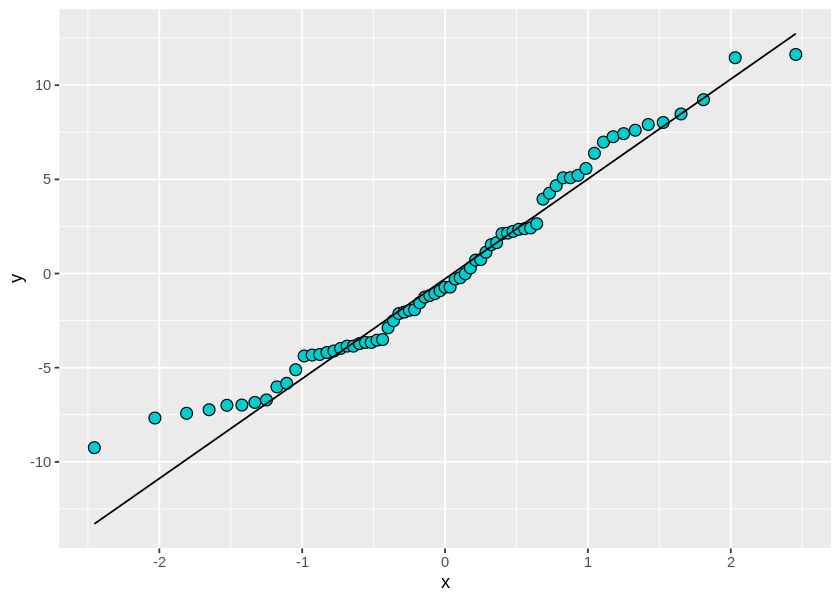

In [47]:
ggplot(mapping = aes(sample = mod3cln$residuals)) +
  stat_qq(shape = 21, colour = "black", fill = "cyan3", size = 3) +
  stat_qq_line()

In [48]:
write.csv(bf_cln, "Edible_grains_clean.csv", row.names = FALSE)